## Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


# Business Understanding

A real estate investment company which is new to the northwest is looking to understand how the homes in King County, Washington are being sold.  They are looking to understand how the attributes of a home increase the sale price. 

# Data Understanding

The data which is being utlized for this project focuses

### Import Packages

In [215]:
import warnings
warnings.filterwarnings('ignore')

In [216]:
# import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/kc_house_data.csv")

data.reset_index(inplace = True)

In [217]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [218]:
data.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

### Data Info

Looking at null values, data types and column names

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

### Check Null Values

An overview of null values in the datasets columns.

In [220]:
data.isna().sum()

index               0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Clean Data

### Squarefeet Basement

Squarefeet basement was listed as an object.  To make clean this category we replaced the '?" will null values.  After changing the dat type from an object to a float we filled the null values with the mean of the overall column.  Rather than determining if there is a basement or not, we kept the square footage to see if price goes up with square footage.

In [221]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
2570.0        1
243.0         1
176.0         1
2610.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [222]:
data['sqft_basement'].replace('?',np.nan,inplace=True)

In [223]:
data.sqft_basement = data.sqft_basement.astype("float")

In [224]:
data.sqft_basement.fillna(data['sqft_basement'].mean(),inplace=True)

### Waterfront

Waterfront had null values.  The assumption is that null values represent that there is no waterfront.
Renamed yes to waterfront as 1 and no to waterfront as 0.

In [225]:
data['waterfront'].value_counts(normalize=True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

In [226]:
data['waterfront'].fillna('NO', inplace=True)

In [227]:
data['waterfront'] = data.waterfront.map({'NO': 0, 'YES': 1})

In [228]:
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### Renovated

Change the structure of the data to represent 1 as renovated and 0 as not renovated.  Null values were changed to not renovated under assumption.

In [229]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [230]:
data['yr_renovated'].fillna(0.0, inplace=True)

In [231]:
data['yr_renovated']=data['yr_renovated'].apply(lambda x: 1 if x!=0 else x)

In [232]:
data['yr_renovated'].value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

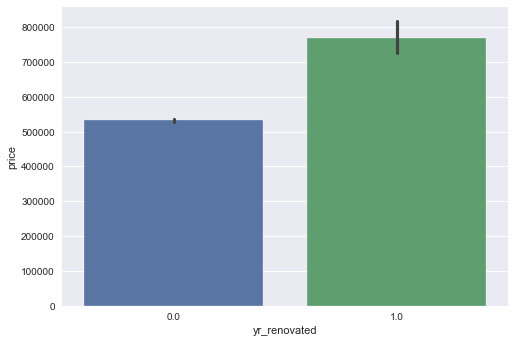

In [233]:
sns.barplot(x = 'yr_renovated', y = 'price', data=data)

### View

In [234]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

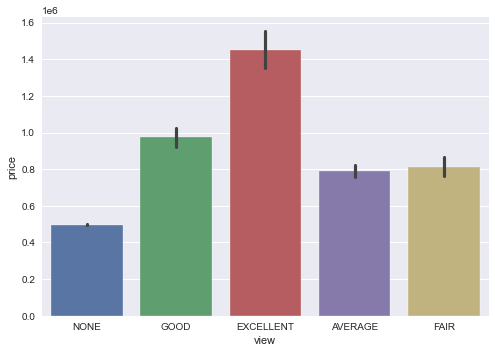

In [235]:
sns.barplot(x = 'view', y = 'price', data=data)

In [236]:
data['view'].fillna('NONE', inplace=True)

In [237]:
data['view']=data['view'].apply(lambda x: 0 if x== 'NONE' else 1)

In [238]:
data['view'].value_counts()

0    19485
1     2112
Name: view, dtype: int64

### Year Built

In [239]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [240]:
data['yr_built']=data['yr_built'].apply(lambda x: 0 if x> 1980 else 1)

In [241]:
data['yr_built'].value_counts()

1    12568
0     9029
Name: yr_built, dtype: int64

### Date

In [242]:
data['date'].value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
5/27/2015       1
11/30/2014      1
5/17/2014       1
1/10/2015       1
5/24/2015       1
Name: date, Length: 372, dtype: int64

In [243]:
date_years = data['date'].apply(lambda x: int(x[-4:]))

In [244]:
date_years.value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

### Grade

Create dummy variables for grade.

In [245]:
data['grade'].value_counts(normalize=True)

7 Average        0.415521
8 Good           0.280826
9 Better         0.121082
6 Low Average    0.094365
10 Very Good     0.052507
11 Excellent     0.018475
5 Fair           0.011205
12 Luxury        0.004121
4 Low            0.001250
13 Mansion       0.000602
3 Poor           0.000046
Name: grade, dtype: float64

In [246]:
grade_dummies = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

In [247]:
data = data.drop(['grade'], axis=1)

In [248]:
data = pd.concat([data, grade_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_3 Poor,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,0,0,0,0,1,0


### Condition

Create dummy variables for condition.

In [249]:
data['condition'].value_counts(normalize=True)

Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name: condition, dtype: float64

In [250]:
condition_dummies = pd.get_dummies(data['condition'], prefix='cnd', drop_first=True)

In [251]:
data = data.drop(['condition'], axis=1)

In [252]:
data = pd.concat([data, condition_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,1,0,0,0,0,0


### Drop columns which are not needed

Drop columns which will not be used in the model.  These columns include id, date, zipcode, lat, and long

In [253]:
data.drop(columns=['id', 'index', 'date', 'zipcode', 'lat', 'long'],
        inplace=True)

# Visualizing Distributions

### Histograms

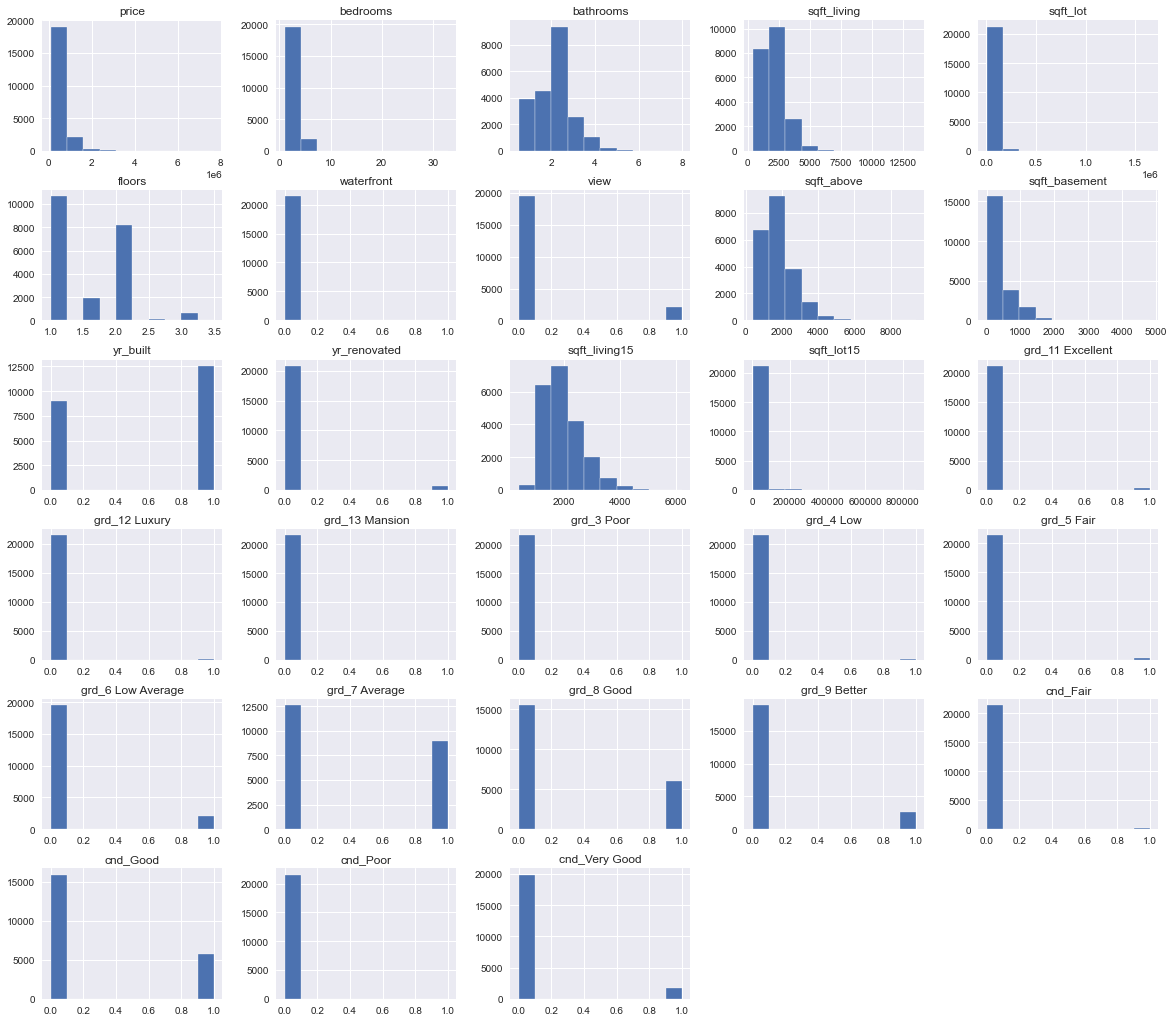

In [254]:
data.hist(figsize = (20, 18));

### Check for Linearity

Checking for linearity between price and the squarefeet of living space.  sqft_living seems to have a linear relationship with list_price.

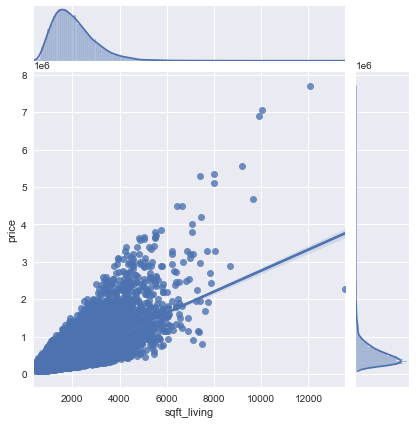

In [255]:
sns.jointplot('sqft_living', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

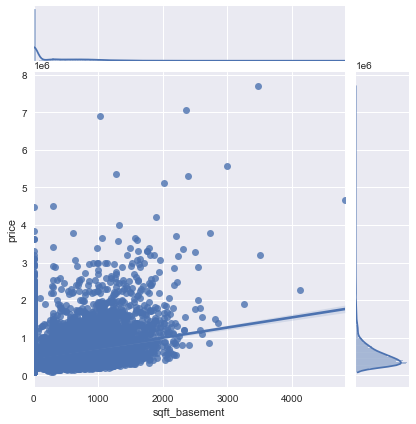

In [256]:
sns.jointplot('sqft_basement', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and the amount of floors.  Seems that price and floors has a slight linear relationship.

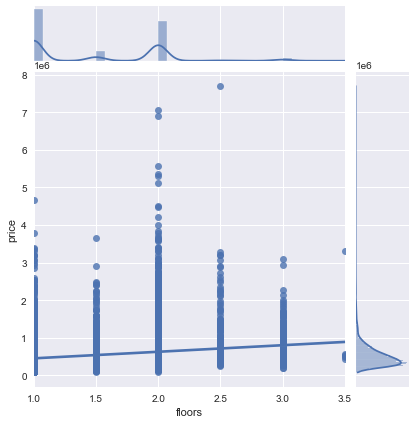

In [257]:
sns.jointplot('floors', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and bathrooms.  Bathrooms and price have a linear relationship.

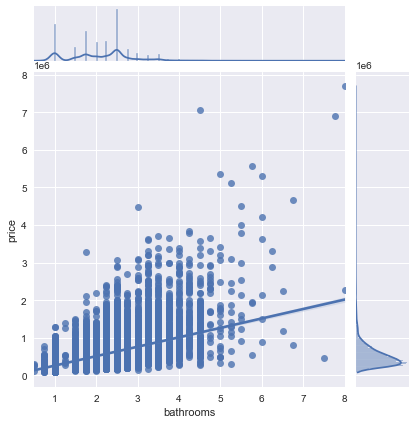

In [258]:
sns.jointplot('bathrooms', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

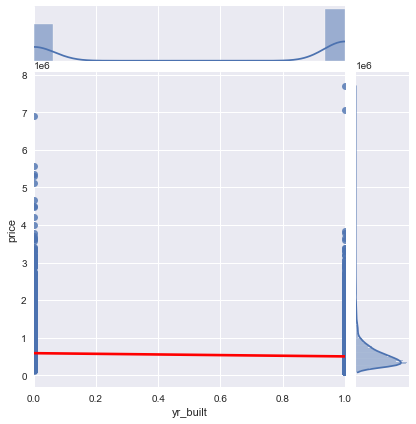

In [259]:
g = sns.jointplot('yr_built', 'price', data=data, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.style.use('seaborn')
sns.set_style("darkgrid")

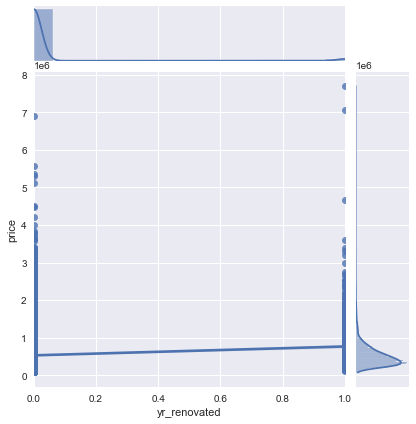

In [260]:
sns.jointplot('yr_renovated', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

### Check for Multicolinearity

<AxesSubplot:>

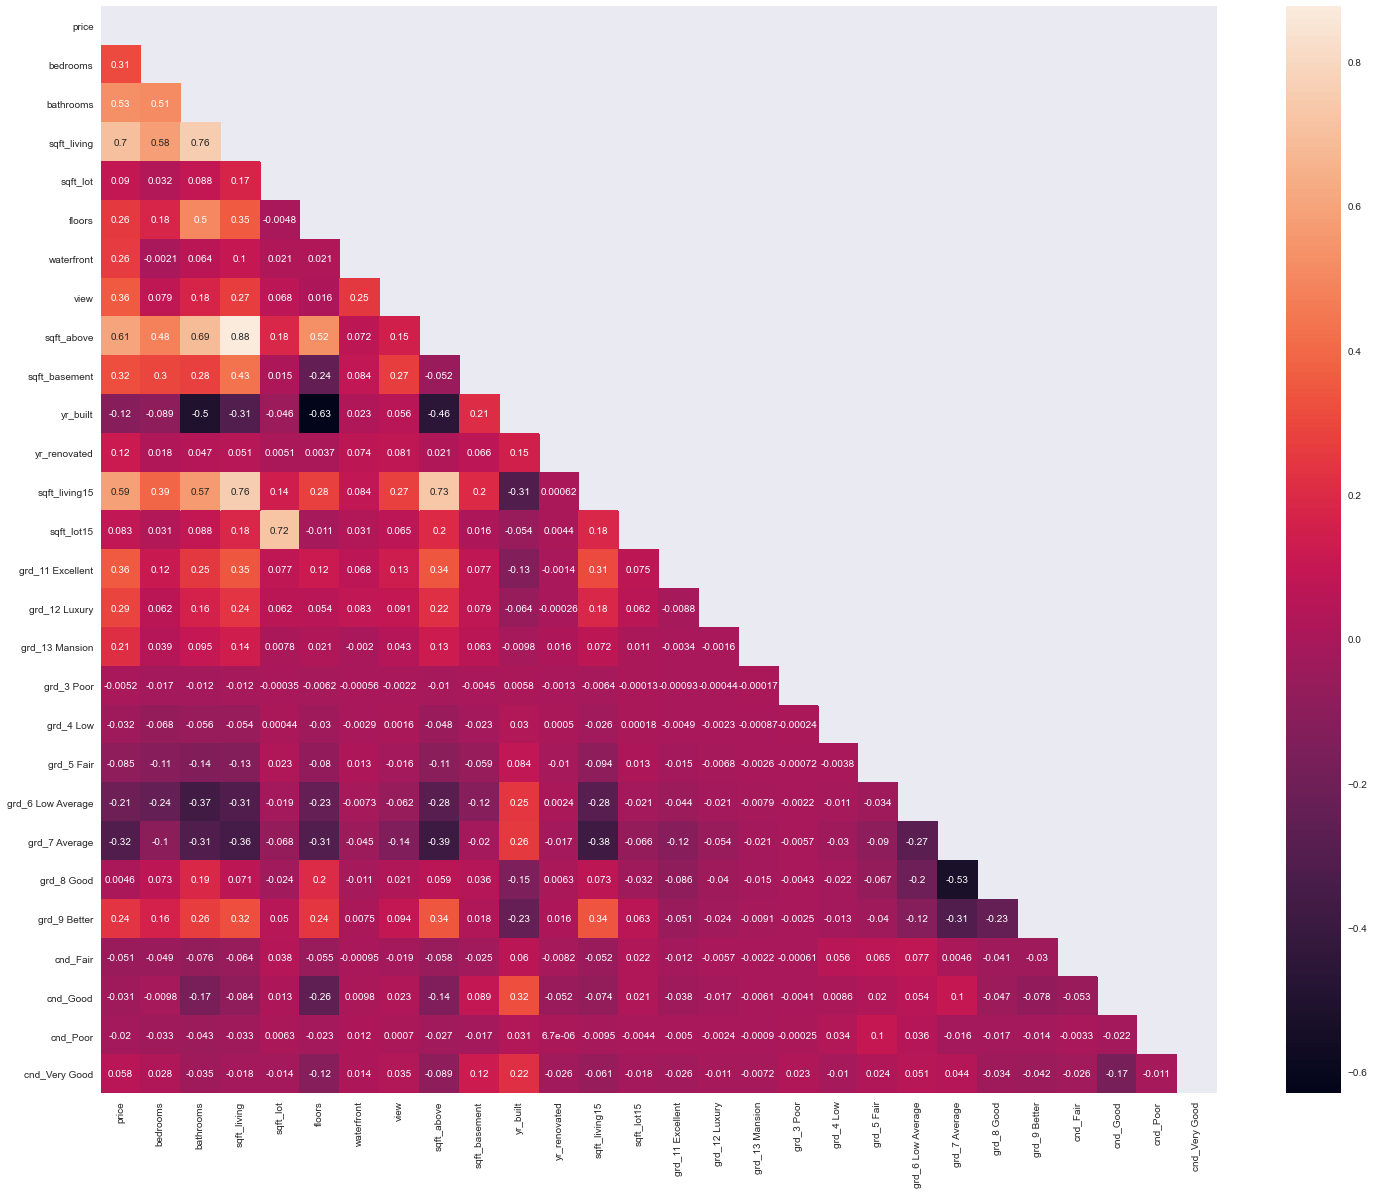

In [261]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask, annot = True)

# Modeling

### Create Baseline Model

In [293]:
y = data['price']

x = data[['sqft_living', 'bathrooms', 'bedrooms', 'waterfront', 'view',
         'sqft_above', 'sqft_basement', 'yr_renovated', 'grd_11 Excellent']]

In [294]:
model_data = x

In [295]:
import statsmodels.api as sm

model_data_int=sm.add_constant(model_data)
baseline_model=sm.OLS(y,model_data_int).fit()
results=baseline_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3192.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:35:16   Log-Likelihood:            -2.9825e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21587   BIC:                         5.966e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.332e+04   6578.295     12.666      0.000    7.04e+04    9.62e+04
sqft_living        199.5506     25.224      7.911      0.000     150.110     248.991
bathrooms         1.194e+04   3301.512      3.615      0.000    5464.404    1.84e+04
bedrooms         -4.185e+04   2223.961    -18.817      0.000   -4.62e+04   -3.75e+04
waterfront        6.725e+05   2.07e+04     32.453      0.000    6.32e+05    7.13e+05
view              1.566e+05   6015.883     26.031      0.000    1.45e+05    1.68e+05
sqft_above          60.5713     25.160      2.407      0.016      11.256     109.886
sqft_basement       66.9705     25.356      2.641      0.008      17.272     116.669
yr_renovated       1.28e+05   9038.697     14.157      0.000     1.1e+05    1.46e+05
grd_11 Excellent  3.033e+05   1.31e+04     23.145      0.000    2.78e+05    3.29e+05
==============================================================================
Omnibus:                    13630.934   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           526172.088
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      26.671   Cond. No.                     3.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remodeling with price log transformation

Run a log function to change the structure of price to make it normally distirbuted.

In [296]:
p = np.log(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

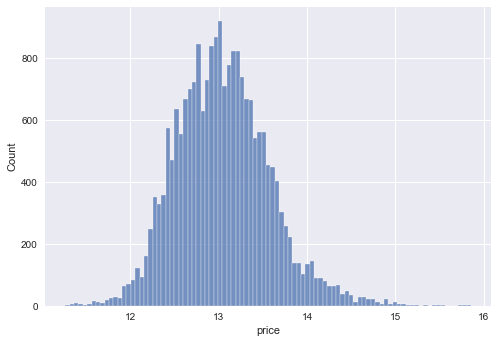

In [297]:
sns.histplot(p)

In [298]:
y_log = p

In [300]:
second_model=sm.OLS(y_log,model_data_int).fit()
results=second_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2596.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:36:07   Log-Likelihood:                -8872.1
No. Observations:               21597   AIC:                         1.776e+04
Df Residuals:                   21587   BIC:                         1.784e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.2943      0.010   1232.468      0.000      12.275      12.314
sqft_living          0.0003   3.82e-05      8.061      0.000       0.000       0.000
bathrooms            0.0573      0.005     11.443      0.000       0.047       0.067
bedrooms            -0.0408      0.003    -12.084      0.000      -0.047      -0.034
waterfront           0.3966      0.031     12.619      0.000       0.335       0.458
view                 0.2299      0.009     25.206      0.000       0.212       0.248
sqft_above        4.582e-05   3.82e-05      1.201      0.230    -2.9e-05       0.000
sqft_basement     4.584e-05   3.84e-05      1.192      0.233   -2.95e-05       0.000
yr_renovated         0.1659      0.014     12.105      0.000       0.139       0.193
grd_11 Excellent     0.1365      0.020      6.868      0.000       0.098       0.175
==============================================================================
Omnibus:                        3.855   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.830
Skew:                          -0.030   Prob(JB):                        0.147
Kurtosis:                       3.024   Cond. No.                     3.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

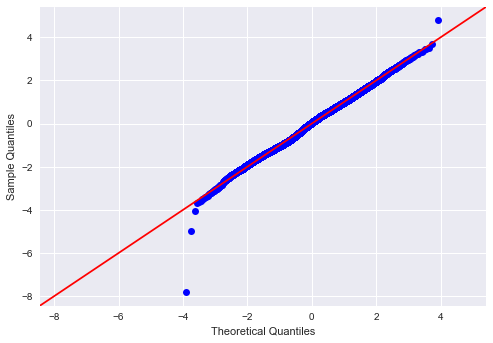

In [301]:
fig = sm.graphics.qqplot(third_model.resid, dist=stats.norm, line='45', fit=True)

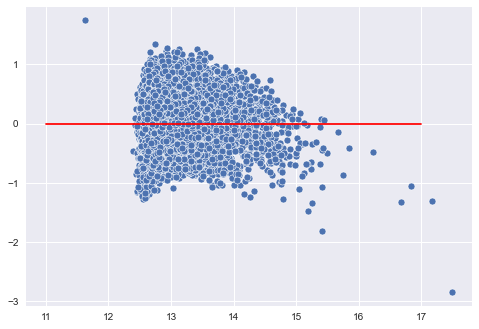

In [302]:
preds = third_model.predict(model_data_int)
plot = sns.scatterplot(preds, third_model.resid)
plot = sns.lineplot([11, 17], [0, 0], color = 'red')

### Remodeling after dropping features

Remodeling after dropping features that have a high p value.

In [303]:
x_2 = data[['sqft_living', 'bathrooms', 'bedrooms', 'waterfront', 'view', 
            'yr_renovated', 'grd_11 Excellent']]

In [304]:
model_data_2 = x_2

In [305]:
model_data_int_2=sm.add_constant(model_data_2)
third_model=sm.OLS(y_log,model_data_int_2).fit()
results=third_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3337.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:39:37   Log-Likelihood:                -8872.8
No. Observations:               21597   AIC:                         1.776e+04
Df Residuals:                   21589   BIC:                         1.783e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.2949      0.010   1243.221      0.000      12.275      12.314
sqft_living          0.0004   4.67e-06     75.803      0.000       0.000       0.000
bathrooms            0.0573      0.005     11.491      0.000       0.048       0.067
bedrooms            -0.0408      0.003    -12.151      0.000      -0.047      -0.034
waterfront           0.3970      0.031     12.635      0.000       0.335       0.459
view                 0.2297      0.009     25.604      0.000       0.212       0.247
yr_renovated         0.1658      0.014     12.105      0.000       0.139       0.193
grd_11 Excellent     0.1367      0.020      6.906      0.000       0.098       0.176
==============================================================================
Omnibus:                        3.751   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.726
Skew:                          -0.030   Prob(JB):                        0.155
Kurtosis:                       3.023   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remodeling After checking Multicolinearity

In [306]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.356243,0.605368,0.322192,...,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859,-0.051432,-0.030759,-0.019886,0.057531
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.079232,0.479386,0.299037,...,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294,-0.049463,-0.009841,-0.032520,0.027500
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.175884,0.686668,0.279541,...,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756,-0.075933,-0.166756,-0.042932,-0.034765
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.268465,0.876448,0.430190,...,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499,-0.063984,-0.083850,-0.033246,-0.018284
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.068216,0.184139,0.015293,...,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646,0.037871,0.013284,0.006265,-0.014452
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.016311,0.523989,-0.242359,...,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184,-0.055337,-0.257672,-0.023029,-0.120546
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.248683,0.071778,0.083779,...,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487,-0.000954,0.009785,0.012406,0.013637
view,0.356243,0.079232,0.175884,0.268465,0.068216,0.016311,0.248683,1.000000,0.151909,0.270177,...,0.001587,-0.015795,-0.062015,-0.143475,0.021123,0.093790,-0.018741,0.023316,0.000698,0.034524
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.151909,1.000000,-0.051781,...,-0.047669,-0.108543,-0.280761,-0.387255,0.059423,0.343388,-0.057698,-0.142520,-0.027236,-0.088596
sqft_basement,0.322192,0.299037,0.279541,0.430190,0.015293,-0.242359,0.083779,0.270177,-0.051781,1.000000,...,-0.022986,-0.059496,-0.121654,-0.020111,0.035989,0.018274,-0.025129,0.089413,-0.017392,0.124712


In [307]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [308]:
data = data.corr().abs().stack().reset_index().sort_values(0, ascending = False)

data['pairs'] = list(zip(data.level_0, data.level_1))

data.set_index(['pairs'], inplace = True)

data.drop(columns=['level_1', 'level_0'], inplace = True)

data.columns = ['cc']

data.drop_duplicates(inplace=True)

data[(data.cc>.75) & (data.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758


The multicolinnearity does not signify anything which is worth changing in the model considering sqft_above, sqft_living 15 have already beeen removed.  Base don this information, it is not deemed necessary to remodel with this information in mind.

# Conclusion